In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
headers = ['molecule_name', 'conformation_name']
for i in range(1, 167):
    name = 'f%i' % i
    headers.append(name)
headers.append('class')

In [7]:
# headers = pd.read_csv('clean2.info')
df = pd.read_csv('clean2.data')
df.columns = headers

In [8]:
df.head(100)

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
1,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
2,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
3,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0
4,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,-168,...,-138,-156,56,143,142,164,-67,-145,40,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MUSK-213,213_1+51,40,87,-144,27,-117,72,56,-164,...,-145,-155,37,2,142,177,-55,-135,101,1.0
96,MUSK-213,213_1+52,40,86,-144,27,-117,72,56,-164,...,-145,-155,37,2,142,177,-55,-135,102,1.0
97,MUSK-213,213_1+53,50,-194,-145,24,232,4,57,-173,...,-54,-7,38,147,163,169,-70,-153,21,1.0
98,MUSK-213,213_1+54,40,87,-145,27,-117,72,56,-164,...,-145,-155,37,2,142,177,-55,-135,101,1.0


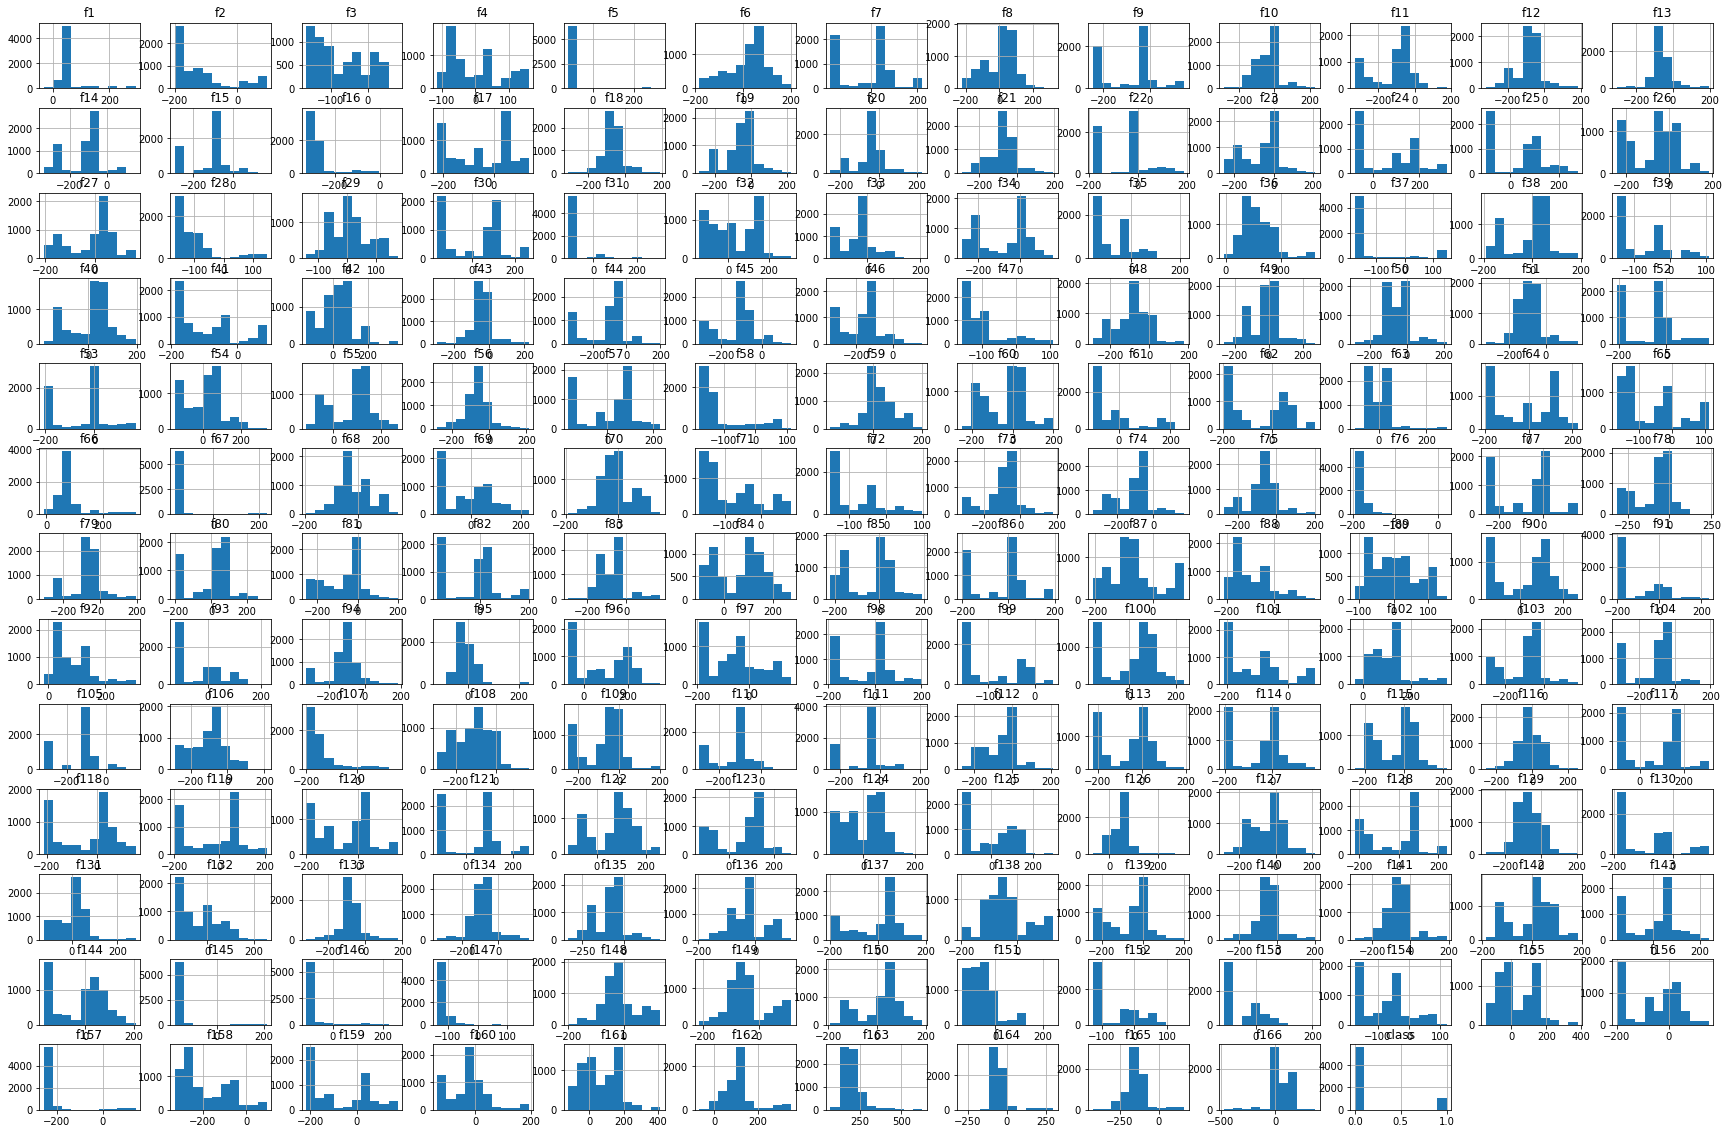

In [25]:
hist = df.hist(figsize=(30,20))

# Hypotheses (1/2 - 2/3 pages)
## Responsible: Alex and Nate (after Analysis)
1. Can we think about feature selection?
    - PCA analysis?
2. Does using imablanced learning help out predictions?
3. If we move from first order to second order gradient descent, does that imporve the computational time of learning
    - This is for both MLE and MAP
    
**TODO:** rephrase and finalize hypotheses
    
### Notes:
- Reference specific model/learning method properties and dataset properties
- Describe how to measure performance to come to conclusion
- May want to consider doing some statistical significance testing

# Part 1: Analysis (2.5 pages of writing)
- 3-4 graphs
     - 1-2 paragraphs per graph
- Description of trends: 2 paragraphs
**TODO**: All steps

## Step 1: Produce some marginal distributions of each feature in the dataset
### Responsible: Alex
- We'll pick a few and just do those sthat represent everything
- Showing the histograms of the features (done)
    - We can show the entire set of histograms
    - Describe which are unimodal, bimodal, etc.

## Step 2: Distribution of the outcome
### Responsible: Nate
- Is that applicable?
- Our output is binary and be imbalanced
- again show the histogram and discuss how we think the imbalance might affect learning and how using imbalanced learning techniques might improve our predictions (could be a second hypothesis)

## Step 3: Missing Data
- No missing data

## Step 4: Correlations between features and/or between features and output class
## Responsible:
- Nate (features and features)
- Alex (features and output)

# Part 2: Analysis Description (1/2 - 2/3 pages)
**TODO** Write out description of analysis
- this will probably only happen once we're done

# Part 3: Model and Learning Method Properties (less than 1 page)
**TODO**: Expand on checkpoint 0 and just be clear about all the points listed below

## Model
### Responsible: Nate
- Go into more detail about the model (i.e. likelihood and prior).
- Show equations
- List assumptions
- " You should pay particular attention to describing any properties that you will reference in your performance hypothesis" (what does this mean?)

## Learning Method
### Responsible: Alex
- Describe parameters and how we will learn from them (what are the parameters logistic regression)
- No approximations needed (I think?) because we are only doing MAP estimates (maybe MLE). We are not going to find the posterior predictive